## Miniproject 1 - Neural Networks Approach

In [20]:
import numpy as np 
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [2]:
cd E:\Caltech_Winter\CS 155\mini project1\data

E:\Caltech_Winter\CS 155\mini project1\data


## Import Training Data

In [3]:
from numpy import genfromtxt
import numpy as np
train_file = 'training_data.txt'
test_file = 'test_data.txt'
train_data = genfromtxt(train_file, delimiter=' ')
test_data = genfromtxt(test_file, delimiter=' ')
train_data = train_data[1:]

np.random.seed(123456)
ind = np.random.permutation(train_data.shape[0])
new_train_data = train_data[ind].astype(int)

X_train = new_train_data[:,1:]
y_train = new_train_data[:,0]

# XX = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca=PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
pca.fit(X_train)

X_pca=pca.transform(X_train)
print(X_pca.shape)

(20000, 500)


## Build Neural Networks Function

In [7]:
def NeuralRun(X_train, y_train, num_epoch, dropout, num_hidden_x, learning_rate):
    model = Sequential()
    model.add(Dense(num_hidden_x, input_shape=(len(X_train[0]),)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    # compile network
    Adam = keras.optimizers.Adam(lr = learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])

    fit = model.fit(X_train, y_train, batch_size = 32, epochs=num_epoch, verbose=0)

    return model

## Cross Validation Function

In [16]:
def CrossValidation(X_train, y_train, num_epoch, fold, dropout, num_hidden_x, learning_rate):
    
    kf = KFold(n_splits=fold)
    max_acc = 0
    i = 1
    sum_val_acc = 0
    train_acc = np.zeros(fold)
    val_acc = np.zeros(fold)
    
    print('Parameters: [Epochs] %d, [Fold] %d; [Dropout] %s, [Hidden X] %d, [Learning Rate] %s' 
          % (num_epoch, fold, dropout, num_hidden_x, learning_rate))
    print('Start Training...')
    for train_index, test_index in kf.split(X_train):
        print('Train on Fold %1d' % i)
        i = i + 1
        
        model = NeuralRun(X_train[train_index], y_train[train_index], num_epoch, dropout, num_hidden_x, learning_rate)
        
        # Printing the accuracy of our model, according to the loss function specified in model.compile
        score1 = model.evaluate(X_train[train_index], y_train[train_index], verbose=0)
        print('Training accuracy:', score1[1])
        train_acc[i - 2] = score1[1]
        score2 = model.evaluate(X_train[test_index], y_train[test_index], verbose=0)
        print('Test accuracy:', score2[1])
        val_acc[i - 2] = score2[1]
        
        sum_val_acc += score2[1]
        
        if score2[1] > max_acc:
            max_model = model
            max_acc = score2[1]
    
    print('Best accuracy:', max_acc, 'Avg accuracy:', sum_val_acc / fold)
    return train_acc, val_acc

In [22]:
def plot_learning_curve(train_errors, val_errors, train_sizes, title, ylim=None, save_name=None):
    
    train_errors_mean = np.mean(train_errors, axis = 1)
    train_errors_std = np.std(train_errors, axis = 1)
    val_errors_mean = np.mean(val_errors, axis = 1)
    val_errors_std = np.std(val_errors, axis = 1)
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Dropout Rate")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.fill_between(train_sizes, train_errors_mean - train_errors_std, \
                     train_errors_mean + train_errors_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, val_errors_mean - val_errors_std, \
                    val_errors_mean + val_errors_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_errors_mean, 'o-', color = 'r', label = "Training accuracy")
    plt.plot(train_sizes, val_errors_mean, 'o-', color = 'g', label = "Cross-validation accuracy")
    plt.legend(loc = 'best')
    
    if save_name is not None:
        plt.savefig(save_name + '.png', dpi=600)
    
    return plt

## Testing for Parameters

In [25]:
fold = 5
dropout = np.linspace(0, 1, 11)
num_hidden_x = 70
learning_rate = 0.001
num_epoch = 10
N = len(dropout)
train = np.zeros((N, fold))
val = np.zeros((N, fold))
for i in range(N):
    train[i, :], val[i, :] = CrossValidation(X_train, y_train, num_epoch, fold, dropout[i], num_hidden_x, learning_rate)
# plot_learning_curve(train, val, dropout, 'NN', save_name='figure1')

Parameters: [Epochs] 10, [Fold] 5; [Dropout] 0.0, [Hidden X] 70, [Learning Rate] 0.001
Start Training...
Train on Fold 1
Training accuracy: 0.995125
Test accuracy: 0.83075
Train on Fold 2
Training accuracy: 0.995125
Test accuracy: 0.81975
Train on Fold 3
Training accuracy: 0.9963125
Test accuracy: 0.82375
Train on Fold 4
Training accuracy: 0.9948125
Test accuracy: 0.83225
Train on Fold 5
Training accuracy: 0.99475
Test accuracy: 0.8305
Best accuracy: 0.83225 Avg accuracy: 0.8274000000000001
Parameters: [Epochs] 10, [Fold] 5; [Dropout] 0.1, [Hidden X] 70, [Learning Rate] 0.001
Start Training...
Train on Fold 1
Training accuracy: 0.9926875
Test accuracy: 0.84
Train on Fold 2
Training accuracy: 0.9936875
Test accuracy: 0.82825
Train on Fold 3
Training accuracy: 0.9935625
Test accuracy: 0.83675
Train on Fold 4
Training accuracy: 0.9928125
Test accuracy: 0.829
Train on Fold 5
Training accuracy: 0.9923125
Test accuracy: 0.8375
Best accuracy: 0.84 Avg accuracy: 0.8343
Parameters: [Epochs] 10,

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

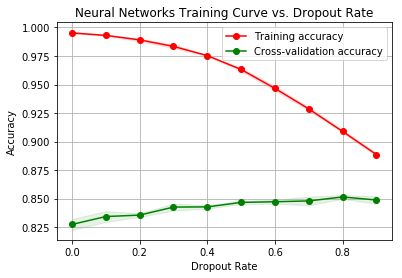

In [28]:
plot_learning_curve(train[:-1], val[:-1], dropout[:-1], 'Neural Networks Training Curve vs. Dropout Rate', save_name='figure1')

## Try Bagging

In [20]:
y_stack = np.zeros((len(y_train), 1))

In [21]:
fold = 5
dropout = 0.8
num_hidden_x = 80
learning_rate = 0.001
num_epoch = 10
kf = KFold(n_splits=fold)

for train_index, test_index in kf.split(X_train):
    model = NeuralRun(X_pca[train_index], y_train[train_index], num_epoch, dropout, num_hidden_x, learning_rate)
    y_stack[test_index] = model.predict(X_pca[test_index])

In [22]:
y_stack_int = [1 if i > 0.5 else 0 for i in y_stack]

with open("NNPCA.txt", 'a') as text_file:
    text_file.write("Id,Prediction\n")
    for i in range(len(y_stack_int)):
        text_file.write("{},{}\n".format(i+1, y_stack_int[i]))

## Prediction in test

In [24]:
X_test = test_data[1:]
X_test_pca = pca.transform(X_test)

model = NeuralRun(X_pca, y_train, num_epoch, dropout, num_hidden_x, learning_rate)
y_test = model.predict(X_test_pca)

In [26]:
y_test_int = [1 if i > 0.5 else 0 for i in y_test]

with open("NNPCATest.txt", 'a') as text_file:
    text_file.write("Id,Prediction\n")
    for i in range(len(y_test_int)):
        text_file.write("{},{}\n".format(i+1, y_test_int[i]))

## Help for Adaboost

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

y_stack_ada = np.zeros(len(y_train))

fold = 5
kf = KFold(n_splits=fold)
i = 0

for train_index, test_index in kf.split(X_train):
    if i > 2:
        break
    i = i + 1
    print('New Fold Starts...')
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), algorithm="SAMME", n_estimators=1500, learning_rate=1.0)
    model.fit(X_train[train_index], y_train[train_index])
    y_stack_ada[test_index] = model.predict(X_train[test_index])
    print('1 Fold Complete...')

print(y_stack_ada)

New Fold Starts...
1 Fold Complete...
New Fold Starts...
1 Fold Complete...
New Fold Starts...
1 Fold Complete...
[0. 0. 1. ... 0. 0. 0.]


In [19]:
y_stack_int = [1 if i > 0.5 else 0 for i in y_stack_ada]

with open("AdaBoost.txt", 'a') as text_file:
    text_file.write("Id,Prediction\n")
    for i in range(len(y_stack_int)):
        text_file.write("{},{}\n".format(i+1, y_stack_int[i]))